---
title: Blogging from a Python Jupyter Notebook
author: Marlan
date: 2018-03-30
categories:
  - Python
tags:
  - Blogdown
  - Python
output:
  blogdown::html_page:
    toc: true
---

This is a follow on post to Stefan's [original](/posts/how_to_add_a_blog/) to show how to generate a blog post from a Jupyter Notebook instead of an R markdown. This post itself started off life as a Jupyter Notebook which lives in the same `content/posts` folder as the other Rmd files used for the site. We'll walk through how it became a blog post.

The process is a little more complicated than for the Rmd files (since that's what Blogdown was built for but we can still get it to work relatively easily. The process will involve setting up the Jupyter Notebook as usual, converting to a standard Markdown file, and then making some minor edits to make sure everything displays correctly.

## Step 0: Start off with the header block

The first thing you'll notice (if you're looking at the original notebook file) is the Rmd style header block at the top of the notebook. This would not generally be part of a Jupyter Notebook or a regular Markdown file, but Blogdown requires it so that it knows what to do with this post we I just copy-pasted one from another post and edited it accordingly.

For this post it looks like
```
---
title: Blogging from a Python Jupyter Notebook
author: Marlan
date: 2018-03-30
categories:
  - Python
tags:
  - Blogdown
  - Python
output:
  blogdown::html_page:
    toc: true
---
```

## Step 1: Prepare a Jupyter Notebook with some useful content

### Basic Formatting

We'll start off with some text.

You can use all the usual markdown stuff like **bold** text and *italics*, 

quotes
> Beautiful is better than ugly.  
Explicit is better than implicit.  
Simple is better than complex.  
Complex is better than complicated.  

and lists

- [x] Write a blog on writing blogs
- [ ] Write a blog that's not quite so meta
- [ ] Do some actual analytics

Jupyter uses the same flavour of markdown as Github so you can refer to the reference [here](https://help.github.com/articles/basic-writing-and-formatting-syntax/) for more complicated formatting

### Images

![python meme](../../static/Pictures/python_meme.jpg)

Place any images you want to include in the `static/Pictures` folder (create a specific folder in there for your post to keep things neat).

The syntax to insert an image is the same as in the Rmd. For example, for the image above I used
```md
![python meme](../../static/Pictures/python_meme.jpg)
```

Note that I used the relative path to the image from the `content/Posts` folder so that the image displays correctly in the Jupyter Notebook. If you used this as is in Blogdown, it wouldn't work (you'd see a broken image link with the alt text *python meme*). 

Paths are a bit tricksy in Blogdown. It considers the `static` folder to be the root so we'll have to change this in the final markdown to
```md
![python meme](/Pictures/python_meme.jpg)
```

### Code

Of course the whole point of doing this in a Jupyter Notebook is to actually write and run some code (otherwise we could just write this in plain Markdown)

Let's get some interesting data from a public api and do a quick plot. I'm going to track driver Fernando Alonso's travails during the 2017 Formula 1 season, grabbing data from this [site](https://ergast.com/mrd/). 

We'll use the `requests` library to make the HTTP GET request to the API

In [1]:
import requests
import json

In [2]:
alonso_results = requests.get("https://ergast.com/api/f1/2017/drivers/alonso/results.json").json()
print(json.dumps(alonso_results, indent=2))

{
  "MRData": {
    "xmlns": "http://ergast.com/mrd/1.4",
    "series": "f1",
    "url": "http://ergast.com/api/f1/2017/drivers/alonso/results.json",
    "limit": "30",
    "offset": "0",
    "total": "19",
    "RaceTable": {
      "season": "2017",
      "driverId": "alonso",
      "Races": [
        {
          "season": "2017",
          "round": "1",
          "url": "https://en.wikipedia.org/wiki/2017_Australian_Grand_Prix",
          "raceName": "Australian Grand Prix",
          "Circuit": {
            "circuitId": "albert_park",
            "url": "http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit",
            "circuitName": "Albert Park Grand Prix Circuit",
            "Location": {
              "lat": "-37.8497",
              "long": "144.968",
              "locality": "Melbourne",
              "country": "Australia"
            }
          },
          "date": "2017-03-26",
          "time": "05:00:00Z",
          "Results": [
            {
              "numbe

This JSON response is quite long, containing a lot of information we're not going to use (interesting though). In Jupyter, this output would be contained in a scrollable cell. For this blog post I've shortened it manually in the mardown to just one result record. Let's strip out just the info we need from the full JSON response to a nice tidy dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
alonso_results_list = [
    {
        "round": int(race["round"]),
        "started": int(race["Results"][0]["grid"]),
        "finished": int(race["Results"][0]["position"])
    } for race in alonso_results["MRData"]["RaceTable"]["Races"]
]
alonso_results_list

[{'finished': 14, 'round': 1, 'started': 12},
 {'finished': 16, 'round': 2, 'started': 13},
 {'finished': 14, 'round': 3, 'started': 15},
 {'finished': 20, 'round': 4, 'started': 15},
 {'finished': 12, 'round': 5, 'started': 7},
 {'finished': 16, 'round': 7, 'started': 12},
 {'finished': 9, 'round': 8, 'started': 19},
 {'finished': 19, 'round': 9, 'started': 12},
 {'finished': 18, 'round': 10, 'started': 20},
 {'finished': 6, 'round': 11, 'started': 7},
 {'finished': 18, 'round': 12, 'started': 10},
 {'finished': 17, 'round': 13, 'started': 19},
 {'finished': 17, 'round': 14, 'started': 8},
 {'finished': 11, 'round': 15, 'started': 10},
 {'finished': 11, 'round': 16, 'started': 20},
 {'finished': 17, 'round': 17, 'started': 8},
 {'finished': 10, 'round': 18, 'started': 18},
 {'finished': 8, 'round': 19, 'started': 6},
 {'finished': 9, 'round': 20, 'started': 11}]

In [8]:
alonso_results_df = pd.DataFrame(alonso_results_list).set_index("round")
alonso_results_df

,finished,started
round,,
1,14,12
2,16,13
3,14,15
4,20,15
5,12,7
7,16,12
8,9,19
9,19,12
10,18,20


And then plot those results

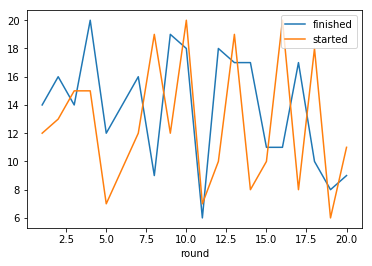

In [9]:
alonso_results_df.plot()

All a bit up and down really.

Right that should be enough content for our blog.

## Step 2: Convert the Jupyter Notebook to a Markdown file

Jupyter comes with a command line tool called `nbconvert` to convert notebooks to a variety of other formats. Open a new terminal (you can do this from Jupyter beneath the options for new notebooks). Navigate to the location of your notebook and run the nbconvert utility as follows,

```bash
jupyter nbconvert --to=markdown Blogging_from_Jupyter.ipynb
```

You'll notice there is a now a file with the same name but a `.md` extension. There is also a folder called `Blogging_from_Jupyter_files`. This is where any images created by running the notebook (e.g. graphs) will be stored.

## Step 3: Open the Markdown file and edit file paths

## Step 4: Run Blogdown in RStudio to preview the results

## Step 5: Make a pull request to the StatsLab project